In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('grades.csv')
df

,PrelimGrade,MidtermGrade,FinalQuiz1,FinalLab1,Status
0,2.23,3.06,4.00,2.96,1
1,2.10,2.55,3.50,2.45,1
2,2.51,3.03,5.00,2.93,1
3,2.14,4.24,3.30,4.14,1
4,1.98,3.64,3.50,3.54,1
...,...,...,...,...,...
77,2.62,3.28,3.90,2.40,1
78,2.44,3.31,2.75,2.30,1
79,3.07,2.63,2.55,2.40,1
80,4.09,4.90,5.00,5.00,0


In [3]:
df.isnull().sum()

PrelimGrade     0
MidtermGrade    0
FinalQuiz1      1
FinalLab1       0
Status          0
dtype: int64

In [4]:
df.dropna(axis=0, inplace=True)
df

,PrelimGrade,MidtermGrade,FinalQuiz1,FinalLab1,Status
0,2.23,3.06,4.00,2.96,1
1,2.10,2.55,3.50,2.45,1
2,2.51,3.03,5.00,2.93,1
3,2.14,4.24,3.30,4.14,1
4,1.98,3.64,3.50,3.54,1
...,...,...,...,...,...
77,2.62,3.28,3.90,2.40,1
78,2.44,3.31,2.75,2.30,1
79,3.07,2.63,2.55,2.40,1
80,4.09,4.90,5.00,5.00,0


In [7]:
X = df.iloc[:, 0:4].values #independent
y = df.iloc[:, 4:5].values #dependent

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5))
scaled_X = scaler.fit_transform(X)
scaled_X

array([[1.68525896, 2.4532872 , 3.87323944, 2.85263158],
       [1.47808765, 1.74740484, 3.30985915, 2.31578947],
       [2.1314741 , 2.41176471, 5.        , 2.82105263],
       [1.54183267, 4.08650519, 3.08450704, 4.09473684],
       [1.28685259, 3.25605536, 3.30985915, 3.46315789],
       [3.48605578, 3.20069204, 5.        , 3.42105263],
       [4.25099602, 3.51903114, 5.        , 3.66315789],
       [1.73306773, 3.21453287, 5.        , 3.43157895],
       [4.28286853, 3.50519031, 5.        , 3.65263158],
       [3.74103586, 3.33910035, 2.18309859, 3.52631579],
       [2.21115538, 2.95155709, 2.18309859, 3.23157895],
       [3.02390438, 4.26643599, 5.        , 5.        ],
       [3.45418327, 3.18685121, 5.        , 3.41052632],
       [2.29083665, 3.39446367, 3.87323944, 3.56842105],
       [2.00398406, 3.20069204, 3.87323944, 3.42105263],
       [2.01992032, 2.43944637, 2.52112676, 2.84210526],
       [2.62549801, 2.70242215, 5.        , 3.04210526],
       [2.96015936, 2.82698962,

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_X,y, random_state = 42)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [10]:
classifier.fit(x_train, y_train)

C:\Users\Carl Astig\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [11]:
y_predict = classifier.predict(x_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [12]:
data_result = pd.DataFrame(x_test)
data_result['predicted'] = y_predict
data_result['actual'] = y_test
data_result

,0,1,2,3,predicted,actual
0,3.087649,3.034602,2.183099,3.294737,1,1
1,1.685259,2.453287,3.873239,2.852632,1,1
2,1.000000,2.633218,3.873239,2.989474,1,1
3,2.529880,2.965398,2.183099,3.242105,1,1
4,3.278884,3.339100,5.000000,3.526316,1,1
5,2.673307,3.394464,5.000000,3.568421,1,1
6,2.211155,2.951557,2.183099,3.231579,1,1
7,2.800797,3.643599,2.295775,2.894737,1,1
8,1.286853,3.256055,3.309859,3.463158,1,1
9,3.454183,3.186851,5.000000,3.410526,1,1


In [13]:
corr = df.corr()
corr

,PrelimGrade,MidtermGrade,FinalQuiz1,FinalLab1,Status
PrelimGrade,1.000000,0.596775,0.257379,0.257363,-0.602776
MidtermGrade,0.596775,1.000000,0.261942,0.551083,-0.507365
FinalQuiz1,0.257379,0.261942,1.000000,0.502913,-0.162191
FinalLab1,0.257363,0.551083,0.502913,1.000000,-0.238761
Status,-0.602776,-0.507365,-0.162191,-0.238761,1.000000


[[ 1  0]
 [ 0 20]]
1.0


<AxesSubplot: >

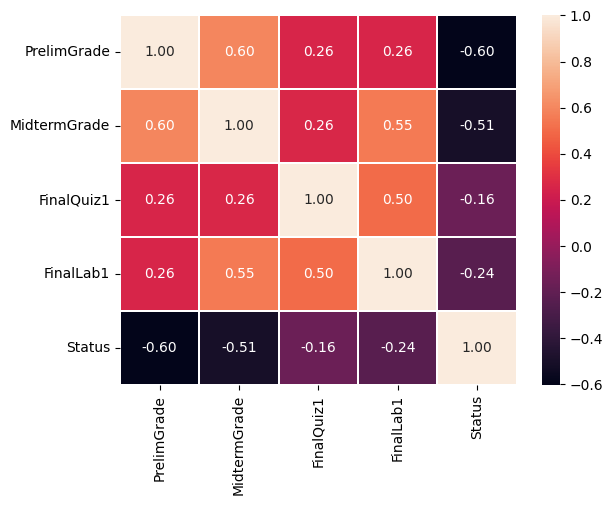

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(cm)
print(accuracy)

cm = pd.crosstab(y_test.flatten(), y_predict, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(corr,annot = True, linewidths=0.2, fmt=".2f")

In [15]:
import pickle    
Model = pickle.dump(classifier,open('model.pkl','wb'))  